In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
from kid_readout.interactive import *

INFO     2017-01-11 23:51:30,932 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [4]:
from kid_readout.measurement import mmw_source_sweep

In [5]:
files = glob.glob('/artemis/readout/2017-01-10_1[6789]*')
files += glob.glob('/artemis/readout/2017-01-10_2*')
files += glob.glob('/artemis/readout/2017-01-11_0*')

files.sort()


In [6]:
len(files)

573

In [7]:
def get_df(fn):
    try:
        ncf = NCFile(fn)
#        print fn
        ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)
        return ssa.to_dataframe()    
    except Exception as e:
#        print "bad:",fn,e
        return None

In [8]:
import joblib

In [9]:
pp = joblib.Parallel(n_jobs=20,verbose=5)
rows = pp([joblib.delayed(get_df)(fn) for fn in files])

[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:   47.0s
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done 248 tasks      | elapsed:  5.1min
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  

In [10]:
rows = [row for row in rows if row is not None]

In [11]:
import pandas as pd

In [12]:
df = pd.concat(rows,ignore_index=True)
df.shape

(2280, 84)

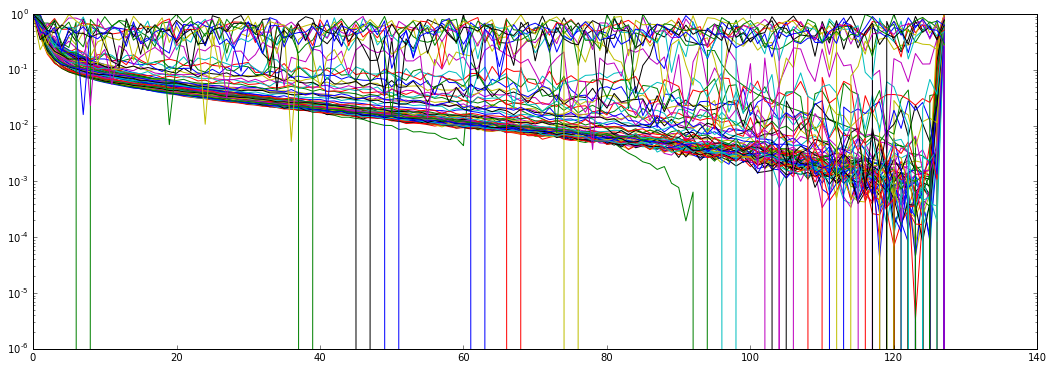

In [18]:
figure(figsize=(18,6))
dd = df[(df.number==2) & (df.roach_dac_attenuation==10) & (df.res_f_0 < 1400e6)]
for k,row in dd.iterrows():
    #plot(row.res_frequency_data,dB(row.res_s21_data))
    y = row.folded_x
    y = y-y.min()
    y = y/y.max()
    #idx = np.flatnonzero(np.diff(y) > 3e-6)[0]
    idx = y.argmax()
    y = np.roll(y,-idx)
    plot(y)
#ylim(0,1)
#xlim(0,256)
yscale('log')

In [56]:
import seaborn as sns
sns.set_context('notebook')
sns.set(font_scale=2)

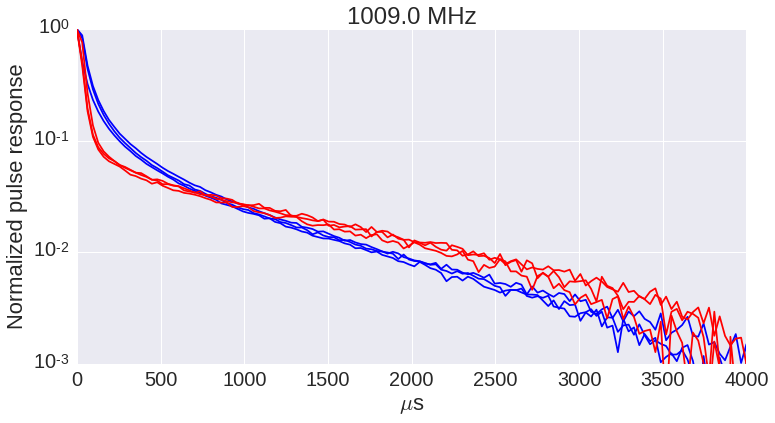

In [63]:
figure(figsize=(12,6))
dd = df[(df.number==0) & (df.roach_dac_attenuation==10) & (df.res_f_0 < 1400e6)]
dd = dd[dd.index<1500]
for k,row in dd.iterrows():
    #plot(row.res_frequency_data,dB(row.res_s21_data))
    if k < 100:
        color='b'
    elif k > 1400:
        color='r'
    else:
        continue
    y = row.folded_x
    y = y-y.min()
    y = y/y.max()
    #idx = np.flatnonzero(np.diff(y) > 3e-6)[0]
    idx = y.argmax()
    y = np.roll(y,-idx)
    t = np.arange(len(y))*2**14/512e6
    plot(t*1e6,y,color)
ylim(1e-3,1)
xlim(0,4000)
yscale('log')
ylabel('Normalized pulse response')
xlabel('$\mu$s')

title('%.1f MHz' %(dd.res_f_0.max()/1e6))

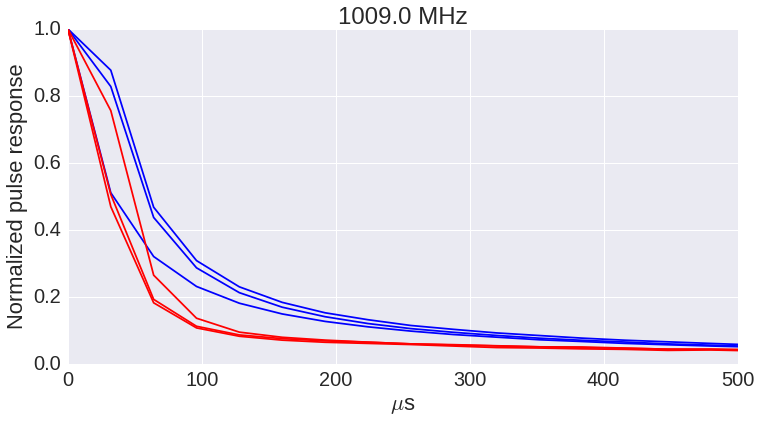

In [65]:
figure(figsize=(12,6))
dd = df[(df.number==0) & (df.roach_dac_attenuation==10) & (df.res_f_0 < 1400e6)]
dd = dd[dd.index<1500]
for k,row in dd.iterrows():
    #plot(row.res_frequency_data,dB(row.res_s21_data))
    if k < 100:
        color='b'
    elif k > 1400:
        color='r'
    else:
        continue
    y = row.folded_x
    y = y-y.min()
    y = y/y.max()
    #idx = np.flatnonzero(np.diff(y) > 3e-6)[0]
    idx = y.argmax()
    y = np.roll(y,-idx)
    t = np.arange(len(y))*2**14/512e6
    plot(t*1e6,y,color)
ylim(1e-3,1)
xlim(0,500)
#yscale('log')
ylabel('Normalized pulse response')
xlabel('$\mu$s')

title('%.1f MHz' %(dd.res_f_0.max()/1e6))

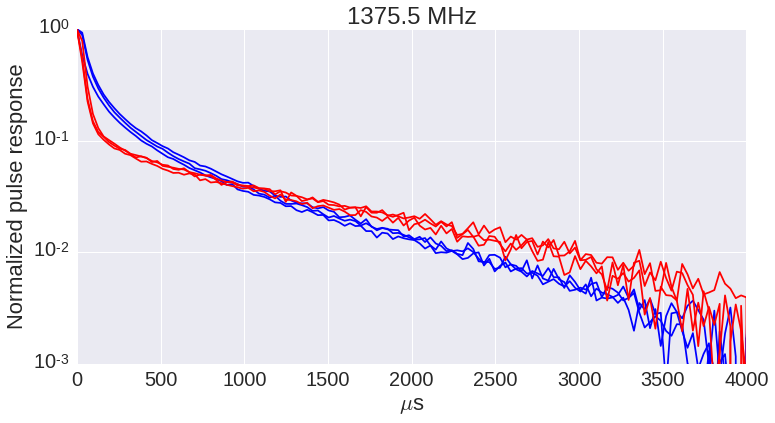

In [59]:
figure(figsize=(12,6))
dd = df[(df.number==1) & (df.roach_dac_attenuation==10) & (df.res_f_0 < 1400e6)]
dd = dd[dd.index<1500]
for k,row in dd.iterrows():
    #plot(row.res_frequency_data,dB(row.res_s21_data))
    if k < 100:
        color='b'
    elif k > 1400:
        color='r'
    else:
        continue
    y = row.folded_x
    y = y-y.min()
    y = y/y.max()
    #idx = np.flatnonzero(np.diff(y) > 3e-6)[0]
    idx = y.argmax()
    y = np.roll(y,-idx)
    t = np.arange(len(y))*2**14/512e6
    plot(t*1e6,y,color)
ylim(1e-3,1)
xlim(0,4000)
yscale('log')
ylabel('Normalized pulse response')
xlabel('$\mu$s')
title('%.1f MHz' %(dd.res_f_0.max()/1e6))

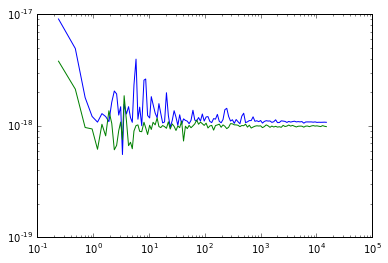

In [13]:

dd = df[(df.number==1) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
row = dd.iloc[2]
loglog(row.S_frequency,row.S_xx)
loglog(row.S_frequency,row.S_yy)


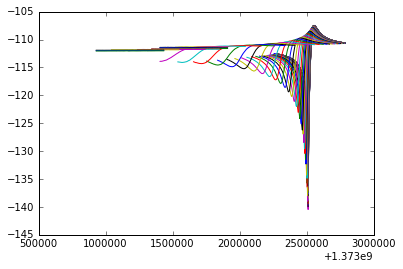

In [17]:
for k,row in dd.iterrows():
    plot(row.res_frequency_data,dB(row.res_s21_data))

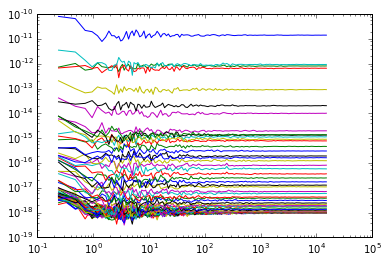

In [20]:
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_yy)

(4000.0, 40000.0)

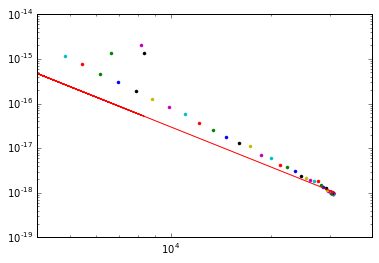

In [40]:
for k,row in dd.iterrows():
    loglog(row.res_Q,row.S_yy[-1],'.')
loglog(dd.res_Q,3e-5*dd.res_Q**-3)
ylim(1e-19,1e-14)
xlim(4e3,4e4)

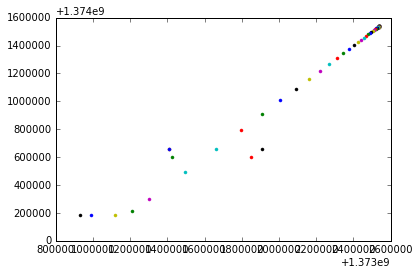

In [14]:
for k,row in dd.iterrows():
    plot(row.res_f_0,row.stream_frequency,'.')

(0, 0.0002)

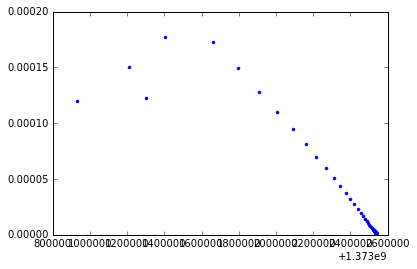

In [15]:
plot(dd.res_f_0,1/dd.res_Q_i,'.')
ylim(0,2e-4)

In [315]:
dd.shape

(70, 83)

In [316]:
y = dd.iloc[40].folded_x

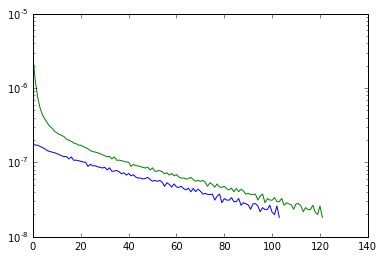

In [317]:
y2 = np.roll(y,-y.argmax())
y2 = y2 - y2.min()
plot(y2[20:-4])
plot(y2[2:-4])
#plot(y2/2)
yscale('log')


In [318]:
def preprocess(y,trim_front=2,trim_back=4):
    y2 = np.roll(y,-y.argmax())
    y2 = y2[trim_front:-trim_back]
    y2 = y2 -y2.min()
    return np.arange(len(y2))*2**14/512e6, y2
    

In [319]:
def one_exp_prior(params):
    A,tau,K = params
    if A < 0 or A > 1e-3 or tau <= 0 or tau > 10e-3 or K < -1 or K > 1:
        return -np.inf
    else:
        return 0
def one_exp_model(params,t):
    A,tau,K = params
    return A*np.exp(-t/tau)+K

def one_exp_likelihood(params,t,data,error = 1e-8):
    A,tau,K = params
    model = one_exp_model(params,t)
    return -np.sum(((model-data)/error)**2)

def one_exp_prob(params,t,data,error = 5e-8):
    prior = one_exp_prior(params)
    if not np.isfinite(prior):
        return prior
    return prior + one_exp_likelihood(params,t,data,error=error)

In [46]:
import emcee,corner

In [320]:
t,y2 = preprocess(y,trim_front=20)

In [321]:
s = emcee.EnsembleSampler(32,3,one_exp_prob,args=(t,y2))

In [322]:
init = np.random.randn(32,3)*y2.max()
init[:,0] = init[:,0].clip(0,1e-3)
init[:,1] = init[:,1].clip(0,1e-3)

In [331]:
p0 = s.run_mcmc(init,5000)

In [332]:
samples = s.chain[:,-200:,:].reshape((-1,3))

In [333]:
samples.mean(0)

array([  1.79262450e-07,   1.97170369e-03,  -3.49903031e-08])

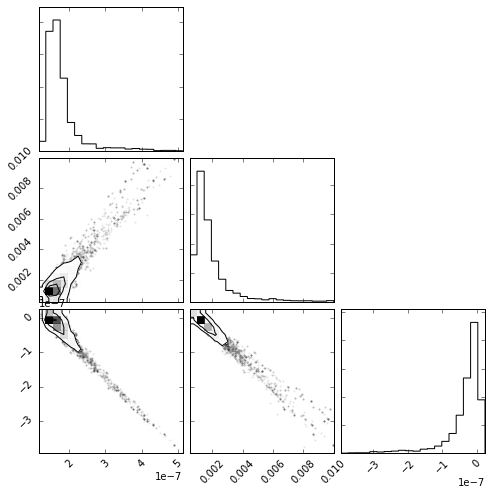

In [334]:
_=corner.corner(samples)

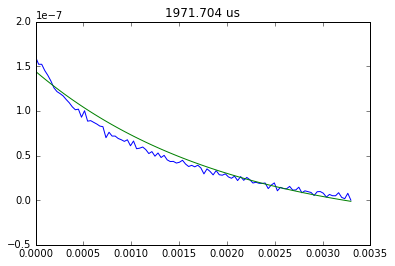

In [335]:
plot(t,y2)
plot(t,one_exp_model(samples.mean(0),t))
title('%.3f us' % (samples.mean(0)[1]*1e6))

In [336]:
def two_exp_prior(params):
    A1,tau1,A2,tau2,K = params
    if (A1 < 0 or A1 > 1e-3 or tau1 <= 500e-6 or tau1 > 10e-3 or K < -1 or K > 1
        or A2 < 0 or A2 > 1e-3 or tau2 < 0 or tau2 > 200e-6):
        return -np.inf
    else:
        return 0
def two_exp_model(params,t):
    A1,tau1,A2,tau2,K = params
    return A1*np.exp(-t/tau1) + A2*np.exp(-t/tau2) +K

def two_exp_likelihood(params,t,data,error = 1e-8):
    model = two_exp_model(params,t)
    return -np.sum(((model-data)/error)**2)

def two_exp_prob(params,t,data,error = 5e-8):
    prior = two_exp_prior(params)
    if not np.isfinite(prior):
        return prior
    return prior + two_exp_likelihood(params,t,data,error=error)

In [356]:
t3,y3 = preprocess(y,trim_front=3)
s = emcee.EnsembleSampler(32,5,two_exp_prob,args=(t3,y3))#,y3/100+5e-8))
init = np.random.randn(32,5)*y2.max()
init[:,0] = init[:,0].clip(0,1e-3)
init[:,2] = init[:,2].clip(0,1e-3)
init[:,3] = (np.random.randn(32)*10e-6).clip(1e-6,99e-6)
init[:,1] = (np.random.randn(32)*1e-3).clip(100e-6,9e-3)

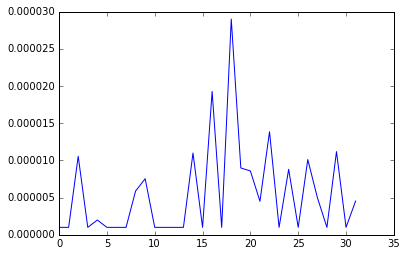

In [357]:
_=plot(init[:,3])

In [358]:
p0= s.run_mcmc(init,5000)

In [359]:
samples = s.chain[:,-1000:,:].reshape((-1,5))

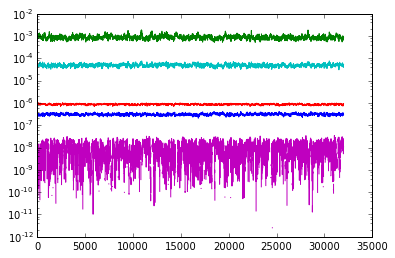

In [360]:
_=semilogy(samples)

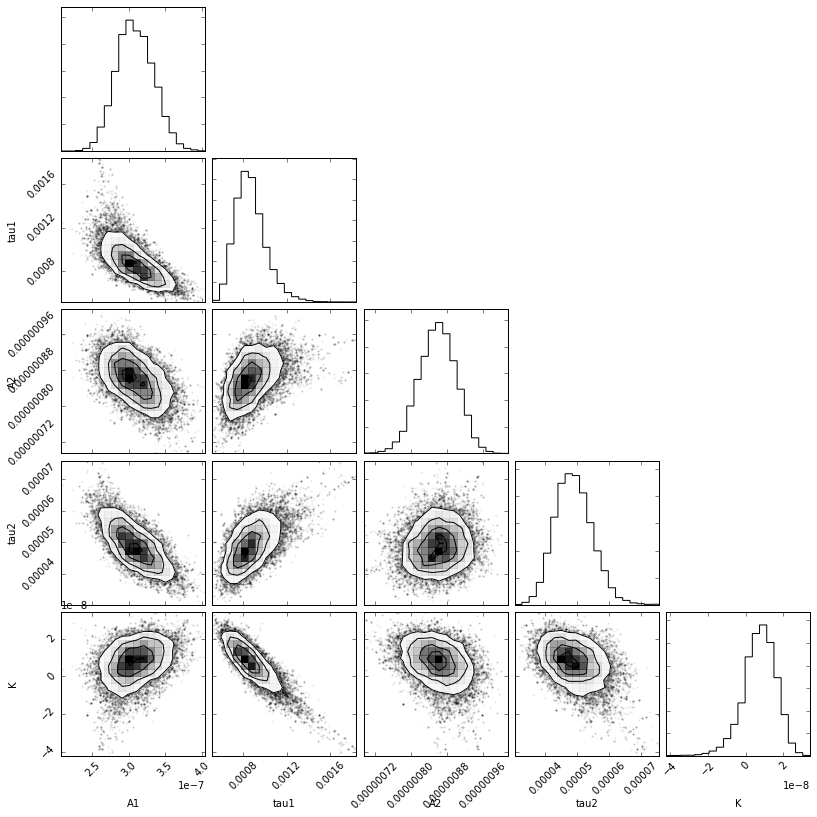

In [361]:
_=corner.corner(samples,labels=['A1','tau1','A2','tau2','K'])

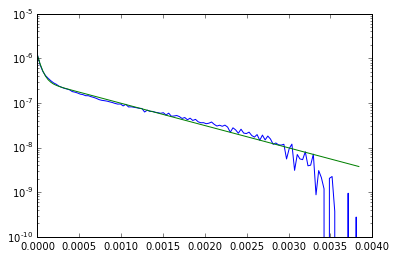

In [363]:
nom = np.mean(samples,0)
plot(t3,y3-nom[4])
plot(t3,two_exp_model(nom,t3)-nom[4])
yscale('log')
#xscale('log')
#title('%.3f us' % (samples.mean(0)[1]*1e6))

In [364]:
nom

array([  3.08596659e-07,   8.70916765e-04,   8.59367213e-07,
         4.89416824e-05,   7.40635173e-09])

In [344]:
def powerlaw_prior(params):
    A,alpha,K = params
    if A < 0 or A > 1 or alpha <= 0 or alpha > 3 or K < -1 or K > 1:
        return -np.inf
    else:
        return 0
def powerlaw_model(params,t):
    A,alpha,K = params
    return A*t**-alpha +K

def powerlaw_likelihood(params,t,data,error = 1e-8):
    model = powerlaw_model(params,t)
    return -np.sum(((model-data)/error)**2)

def powerlaw_prob(params,t,data,error = 5e-8):
    prior = powerlaw_prior(params)
    if not np.isfinite(prior):
        return prior
    return prior + powerlaw_likelihood(params,t,data,error=error)

In [345]:
t3,y3 = preprocess(y,trim_front=2)
t3 = t3+t3[1]
s = emcee.EnsembleSampler(32,3,powerlaw_prob,args=(t3,y3,y3/100+1e-8))
init = np.random.randn(32,3)*y2.max()
init[:,0] = np.random.rand(32)*y2.max()
init[:,1] = np.random.rand(32)*.1+.75
init[:,2] = np.random.rand(32)*y2.max()- y2.max()/2

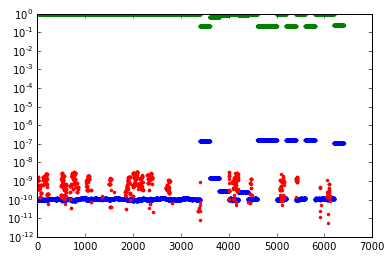

In [346]:
p0= s.run_mcmc(init,10000)
samples = s.chain[:,-200:,:].reshape((-1,3))
_=semilogy(samples,'.')

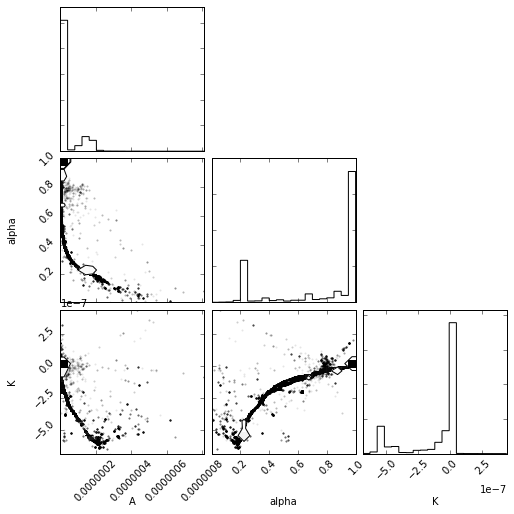

In [347]:
_=corner.corner(s.flatchain,labels=['A','alpha','K'])

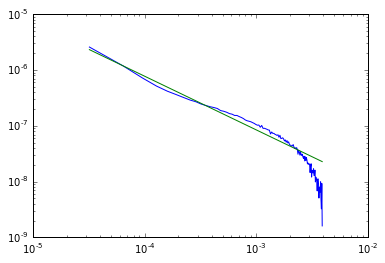

In [348]:
nom = np.median(samples,0)
plot(t3,y3-nom[2])
plot(t3,powerlaw_model(nom,t3)-nom[2])
yscale('log')
xscale('log')

In [236]:
nom

array([  1.68424852e-09,   7.03049306e-01,  -6.22149013e-08])

In [ ]:
figure(figsize=(18,6))
dd = df[(df.number==0) & (df.roach_dac_attenuation==10) & (df.sweep_cold_1550nm_led_current==100e-6)]
for k,row in dd.iterrows():
    if row.res_f_0 < 1010e6 and row.res_f_0 > 1000e6:
        #plot(row.res_frequency_data,dB(row.res_s21_data))
        y = row.folded_x
        if y[128] > y[400]:
            y = np.roll(y,256)
        y = y-y.min()
        #plot(y)
        plot(row.res_Q_i,y[100],'.')

In [365]:
for k,row in dd.iterrows():
    if row.res_f_0 < 1010e6 and row.res_f_0 > 1000e6:
        plot(row.res_frequency_data,dB(row.res_s21_data))

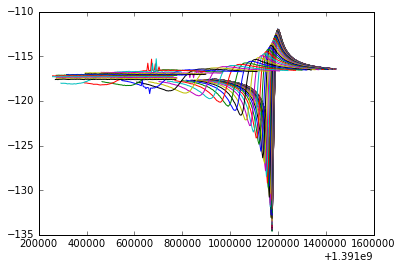

In [366]:
for k,row in dd.iterrows():
    plot(row.res_frequency_data,dB(row.res_s21_data))

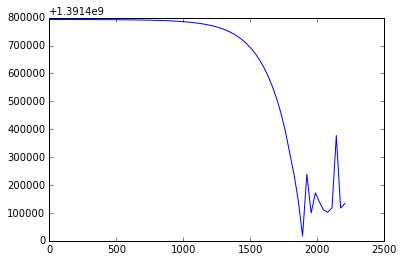

In [372]:
plot(dd.res_f_0)

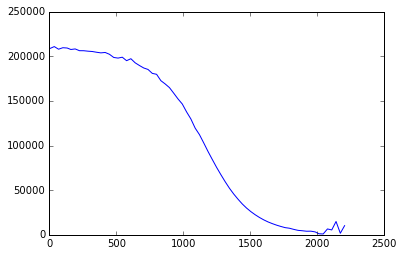

In [20]:
dd = df[(df.number==0) & (df.roach_dac_attenuation==10)
       & (dd.res_f_0<1010e6) & (dd.res_f_0>1000e6)]
plot(dd.res_Q_i)

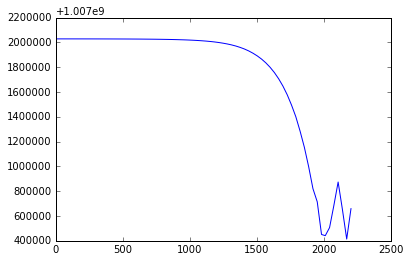

In [21]:
dd = df[(df.number==0) & (df.roach_dac_attenuation==10)
       & (dd.res_f_0<1010e6) & (dd.res_f_0>1000e6)]
plot(dd.res_f_0)

In [17]:
import time

In [18]:
time.ctime(dd.start_epoch.max())

'Tue Jan 10 23:56:07 2017'

In [17]:
filename = files[0+0*4]
print filename
ncf = NCFile(filename)

/artemis/readout/2017-01-09_162718_6_dB_dac.nc


In [18]:
ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray2)

In [8]:
ss = ssa.sweep_stream(1)

In [19]:
df=ssa.to_dataframe()

In [22]:
df.columns

Index([                                u'S_counts',
                                    u'S_frequency',
                                           u'S_xx',
                                  u'S_xx_variance',
                                           u'S_xy',
                                           u'S_yy',
                                  u'S_yy_variance',
                                 u'analysis_epoch',
                          u'folded_normalized_s21',
                                       u'folded_q',
                                       u'folded_x',
                                         u'number',
                                      u'res_A_mag',
                                u'res_A_mag_error',
                                    u'res_A_slope',
                              u'res_A_slope_error',
                                          u'res_Q',
                                        u'res_Q_e',
                                   u'res_Q_e_imag',
            

In [23]:
df.stream_cold_1550nm_led_current

0    0.00001
1    0.00001
2    0.00001
3    0.00001
Name: stream_cold_1550nm_led_current, dtype: float64

(-5, 20)

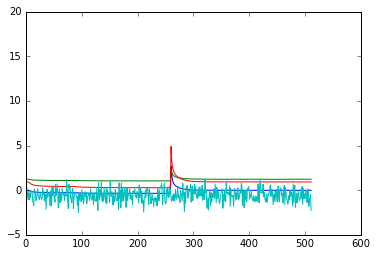

In [20]:
for k,row in df.iterrows():
    plot(1e6*row.folded_x-row.folded_x.min())
ylim(-5,20)

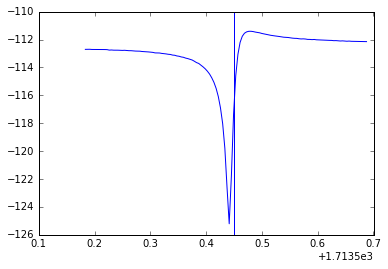

In [258]:
plot(ss.sweep.frequency_MHz,dB(ss.sweep.s21_point))
axvline(ss.stream.frequency_MHz)

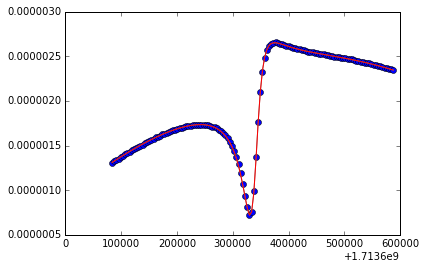

In [224]:
_=ss.resonator.plot()

In [119]:
(1392+1009)/2.

1200.5

In [116]:
(100e-6*2.5)/1e-6

250.00000000000003

In [225]:
ss.resonator.Q

52809.364345043352

In [242]:
ss.x_raw.max()

9.0341846e-06

In [243]:
ss.x.max()

2.772807e-06

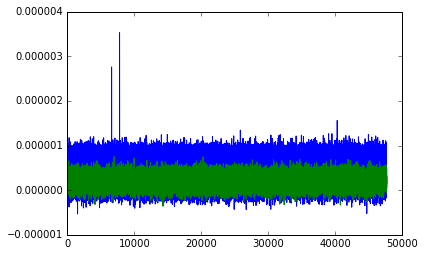

In [259]:
plot(ss.x_raw[ss.glitch_mask])
plot(ss.x[np.roll(ss.glitch_mask,100)])


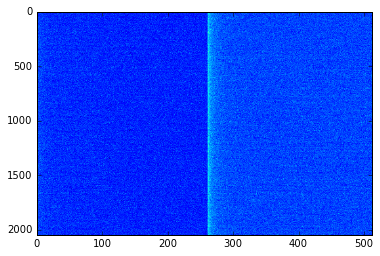

In [265]:
imshow((ss.x_raw.reshape((-1,512))),aspect='auto')

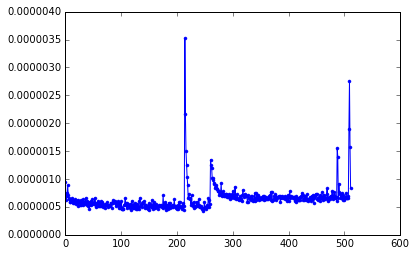

In [266]:
plot(ss.x_raw.reshape((-1,512)).max(0),'.-')
#plot(ss.x.reshape((-1,512)).mean(0),'.-')

#plot(ss.y.reshape((-1,512)).mean(0))

In [228]:
xf = ss.x.reshape((-1,512)).mean(0)
t = np.arange(512)*2**14/512e6

(-1e-06, 1.5e-06)

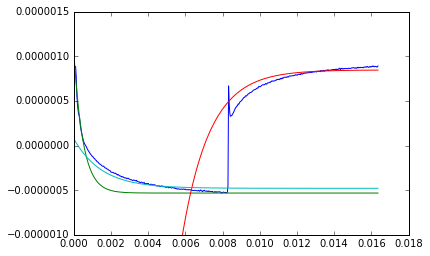

In [229]:
plot(t,xf)
plot(t,1.1*xf.ptp()*np.exp(-t/500e-6)+xf.min())
plot(t,-5e-7*np.exp(-(t-7.8e-3)/1500e-6)+xf.max()*0.95)
plot(t,0.2*xf.ptp()*np.exp(-(t-1e-3)/1500e-6)+xf.min()*.9)
ylim(-1e-6,1.5e-6)
#plot(t,0.2*xf.ptp()*np.exp(-(t-1e-3)/1500e-6)+xf.min()*.9+.8*xf.ptp()*np.exp(-t/500e-6))

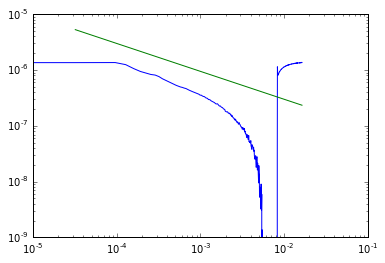

In [230]:
plot(t,xf-xf.min()*0.9)
plot(t,3e-8*(t**-0.5))
xscale('log')
yscale('log')
#ylim(0e-6,2e-6)
#plot(t,0.2*xf.ptp()*np.exp(-(t-1e-3)/1500e-6)+xf.min()*.9+.8*xf.ptp()*np.exp(-t/500e-6))

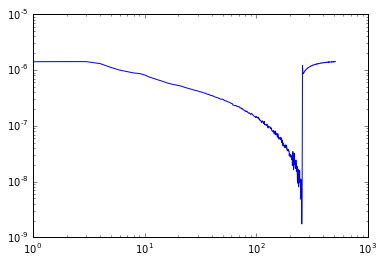

In [231]:
loglog(xf-xf.min())

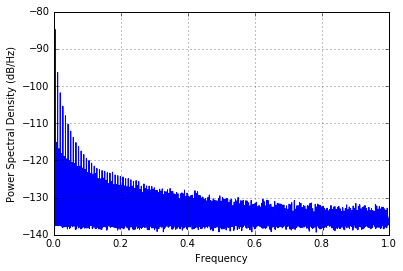

In [233]:
_=psd(ss.x,NFFT=2**15)

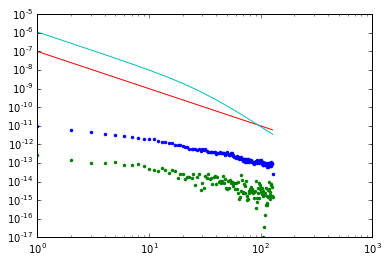

In [234]:
f = np.arange(0,129,dtype='float')
loglog(f,np.abs(np.fft.rfft(ss.x.reshape((-1,256)).mean(0)))**2,'.')
loglog(f,np.abs(np.fft.rfft(ss.y.reshape((-1,256)).mean(0)))**2,'.')

loglog(f,1e-7/f**2)
loglog(f,1e-3*np.abs(f**-1/(30+1j*f))**2)

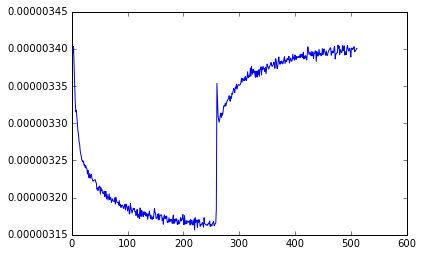

In [237]:
plot(ss.y.reshape((-1,512)).mean(0))

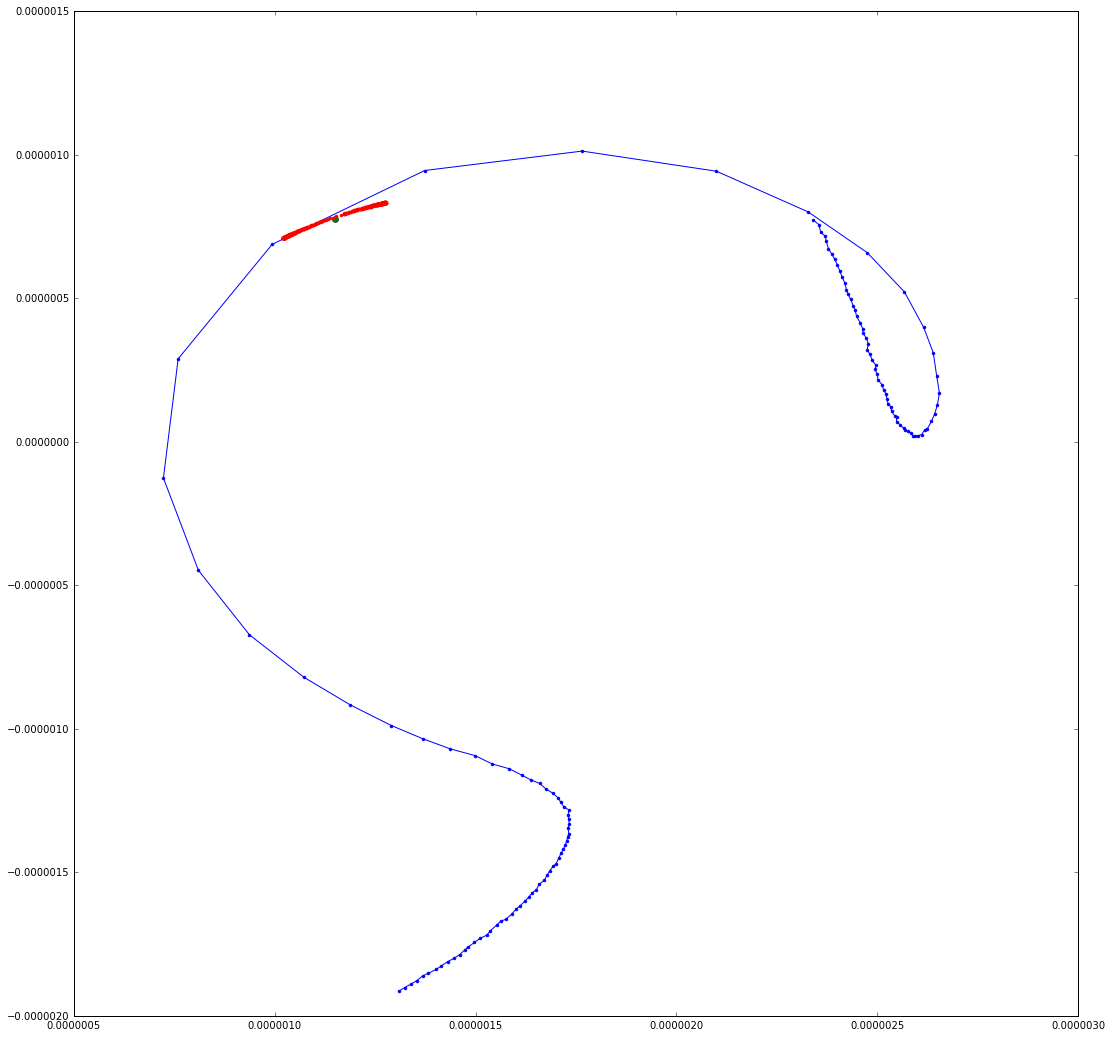

In [236]:
figure(figsize=(18,18))
plot_ri(ss.sweep.s21_point,'.-')
plot_ri(ss.stream.s21_point,'o')
#plot_ri(ss.stream.s21_raw,',')
plot_ri(ss.stream.s21_raw.reshape((-1,512)).mean(0),'.')


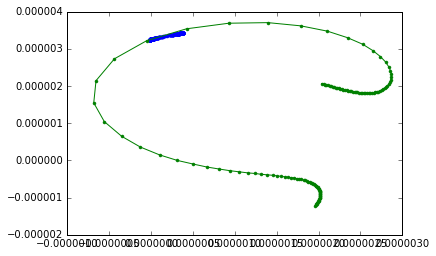

In [219]:
plot_ri(ss.stream.s21_raw.reshape((-1,512)).mean(0),'.')
plot_ri(ss.sweep.s21_point,'.-')